<a href="https://colab.research.google.com/github/jesushzv/UFC_Odds/blob/main/UFC_odds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#In this project, we will test the following hypothesis: MMA matches usually go to the underdog.
#We also want to know, even if underdogs don't win most of the time, if betting exclusively on underdogs yields a positive monitary result
#The betting strategy will be to always bet $100 to the underdog


In [2]:
#Import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#Data originally from https://www.kaggle.com/mdabbert/ufc-fights-2010-2020-with-betting-odds pulled from Ivan Verdugo's github
#Match results with odds from 2010-2020
url = 'https://raw.githubusercontent.com/IvanVC21/ufc/main/data.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender
0,Kevin Lee,Charles Oliveira,-145.0,135.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE
1,Demian Maia,Gilbert Burns,160.0,-170.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE
3,Johnny Walker,Nikita Krylov,-137.0,127.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE


In [5]:
df.shape

(5528, 11)

In [6]:
df.isnull().sum().sort_values(ascending=False).head()

gender          1288
weight_class    1288
title_bout      1288
Winner          1288
country         1288
dtype: int64

In [7]:
#A bit of data cleaning, dropping all of the null values, then confirming we don't have any remaining nulls.

df.dropna(inplace=True)

df.isnull().sum() 

R_fighter       0
B_fighter       0
R_odds          0
B_odds          0
date            0
location        0
country         0
Winner          0
title_bout      0
weight_class    0
gender          0
dtype: int64

In [8]:
#New data set only with date, match odds and winner

df2 = df[['date','R_odds', 'B_odds', 'Winner']]
df2.head()



,date,R_odds,B_odds,Winner
0,3/14/2020,-145.0,135.0,Blue
1,3/14/2020,160.0,-170.0,Blue
2,3/14/2020,-345.0,315.0,Red
3,3/14/2020,-137.0,127.0,Blue
4,3/14/2020,-160.0,150.0,Red


In [9]:
#Created a column to report the profit, initially filled only with NaN

df2['Profit'] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df2

,date,R_odds,B_odds,Winner,Profit
0,3/14/2020,-145.0,135.0,Blue,NaN
1,3/14/2020,160.0,-170.0,Blue,NaN
2,3/14/2020,-345.0,315.0,Red,NaN
3,3/14/2020,-137.0,127.0,Blue,NaN
4,3/14/2020,-160.0,150.0,Red,NaN
...,...,...,...,...,...
4235,3/21/2010,-155.0,135.0,Blue,NaN
4236,3/21/2010,-210.0,175.0,Red,NaN
4237,3/21/2010,-260.0,220.0,Red,NaN
4238,3/21/2010,-420.0,335.0,Red,NaN


In [11]:
#Boolean mask to create a new dataset that matches all of the instances in wich the underdog won

mask = ((df2['R_odds'] > 0) & (df2['Winner'] == 'Red') | (df2['B_odds'] > 0 ) & (df2['Winner'] == 'Blue'))
dog_win = df2[mask]

#To create a dataset with all of the instances in which the dog lost, we just use the NOT operator with the same boolean mask
dog_loss = df2[~mask]


In [12]:
#In the dog_loss DS, the profit will always be -100

dog_loss['Profit'] = (-100)
dog_loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,R_odds,B_odds,Winner,Profit
1,3/14/2020,160.0,-170.0,Blue,-100
2,3/14/2020,-345.0,315.0,Red,-100
4,3/14/2020,-160.0,150.0,Red,-100
6,3/14/2020,-345.0,315.0,Red,-100
7,3/14/2020,-122.0,112.0,Red,-100
...,...,...,...,...,...
4234,3/21/2010,145.0,-165.0,Blue,-100
4236,3/21/2010,-210.0,175.0,Red,-100
4237,3/21/2010,-260.0,220.0,Red,-100
4238,3/21/2010,-420.0,335.0,Red,-100


In [13]:
#With the american odds system, we will profit the odds number for every $100 we bet, so the profit column will be the Underdog odds
dog_win['Profit'] = dog_win.max(axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
dog_win

,date,R_odds,B_odds,Winner,Profit
0,3/14/2020,-145.0,135.0,Blue,135.0
3,3/14/2020,-137.0,127.0,Blue,127.0
5,3/14/2020,-150.0,140.0,Blue,140.0
9,3/14/2020,-140.0,130.0,Blue,130.0
10,3/14/2020,-110.0,100.0,Blue,100.0
...,...,...,...,...,...
4213,3/31/2010,190.0,-230.0,Red,190.0
4218,3/31/2010,173.0,-205.0,Red,173.0
4220,3/27/2010,-150.0,140.0,Blue,140.0
4227,3/27/2010,-160.0,140.0,Blue,140.0


In [15]:
#Compare wins vs losses

result = dog_win['Profit'].sum() + dog_loss['Profit'].sum()
print(result)

-43253.0


In [16]:
#Biggest upsets
print(dog_win['R_odds'].max())
print(dog_win['B_odds'].max())

#Biggest favorites who, indeed, won
print(dog_loss['R_odds'].min())
print(dog_loss['B_odds'].min())


655.0
735.0
-1700.0
-1200.0


In [17]:
#Merge both DF
dataframes = [dog_win, dog_loss]
df3 = pd.concat(dataframes)

In [18]:
df3

,date,R_odds,B_odds,Winner,Profit
0,3/14/2020,-145.0,135.0,Blue,135.0
3,3/14/2020,-137.0,127.0,Blue,127.0
5,3/14/2020,-150.0,140.0,Blue,140.0
9,3/14/2020,-140.0,130.0,Blue,130.0
10,3/14/2020,-110.0,100.0,Blue,100.0
...,...,...,...,...,...
4234,3/21/2010,145.0,-165.0,Blue,-100.0
4236,3/21/2010,-210.0,175.0,Red,-100.0
4237,3/21/2010,-260.0,220.0,Red,-100.0
4238,3/21/2010,-420.0,335.0,Red,-100.0


In [19]:
#Import the datetime library to sort results by month
import datetime 
df3['date'] = pd.to_datetime(df['date'])
df3['date'] = df3['date'].dt.strftime('%Y-%m')

In [20]:

month_by_month = df3.groupby('date', as_index = 'False').agg({'Profit':'sum'})
month_by_month

,Profit
date,
2010-03,-1632.0
2010-04,505.0
2010-05,990.0
2010-06,281.0
2010-07,-93.0
...,...
2019-11,-1120.0
2019-12,-1055.0
2020-01,15.0


In [21]:
#Descriptive statistics
month_by_month.describe()

,Profit
count,121.000000
mean,-357.462810
std,836.344796
min,-2260.000000
25%,-860.000000
50%,-363.000000
75%,175.000000
max,2398.000000


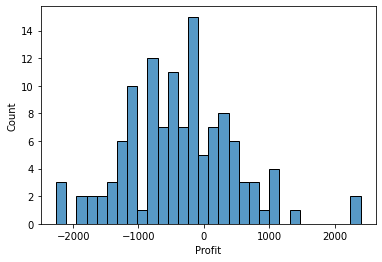

In [22]:
#Histogram of results
sns.histplot(data=month_by_month, x='Profit', bins=30)

In [23]:
#As we could see. not only did underdogs performed worst, but they didn't even perform good enough to break even in our bets